# Real life linear regresion 

In [28]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

Let's import housing data from King County USA 

In [6]:
data = pd.read_csv('/home/kuba/wakacje/machine lerning/house_king_county.csv')
data.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's firstly do simple linear regression with one variable 

In [748]:
X = np.array(data['sqft_living'])
y = np.array(data['price'])

Lets firstly look at our data

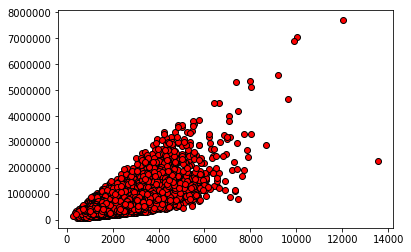

In [749]:
plt.plot(X,y, 'ro', mec ='k')

Unfortunately we cannot do it algebraically because this set is to big and it would take to much time (for real it isn't but we will do it the long way) so firstly let's do it with part of the set, so we will know what the answer should be. 

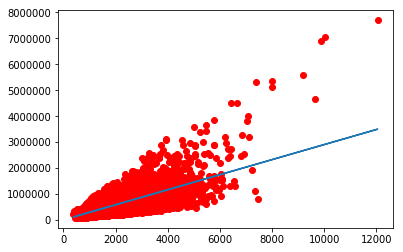

In [747]:
# taking part of data
X2 = X[:5000]
y2 = y[:5000]

# i put ones in front of data, so thetas will multiply nicely :P 
X_1 = np.stack([np.ones(X.size), X],axis=1)

# Doing algebraic magic
A = X_1.transpose() @ X_1
B = np.linalg.inv(A)

# our constants
Theta = B @ X_1.transpose() @ y 

# let's plot this
plt.plot(X,y, 'ro')
plt.plot(X, Theta[1]* X+Theta[1],'-')

Ok, so we know more or less what to expect, let's predict some prices! We will use ML gradient descent method.

In [723]:
def normalizeVariables(X):
    """
    Normalizing varialbles of vectors 
    """
    X_normalized = (X - X.mean())/X.std()
    
    return X_normalized

In [277]:
def gradientDescent(X, y, theta, alpha,iters):
    """
    X - data with ones in front of it ex. first row: 1, x1, x2,...,xn
    y - variable to predict
    theta - constants to start with (it will change) 
    alpha - lerning rate 
    iters - number of iterations
    """
    
    for i in range(iters):
        
        der_x0 = (1/m)*(X@theta - y) @ X[:,0]
        der_x1 = (1/m)*(X@theta - y) @ X[:,1]
        theta[0] = theta[0] - alpha*der_x0
        theta[1] = theta[1] - alpha*der_x1
        
    return theta

Normalizing the variables is essential in this dataset. Tried without it and couldn't make it to coverage

In [750]:
X_n = normalizeVariables(X)
y_n = normalizeVariables(y)


In [735]:
# starting theta
theta = np.zeros(2)

# matrice with ones
X_1 = np.stack([np.ones(X_n.size), X_n],axis=1)

# lerning rate+iterations
alpha = 0.1
num_iters = 10000

b,a = gradientDescent(X_1, y_n, theta, alpha, num_iters)


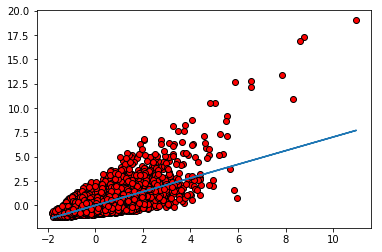

In [737]:
X_n = normalizeVariables(X)
y_n = normalizeVariables(y)
plt.plot(X_n, y_n, 'ro',mec = 'k')
plt.plot(X_n, a * X_n + b, linestyle='-', )  # solid

As we can see it fits with algebraical model 